In [1]:
from numba.core.extending import get_cython_function_address
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import pytz
import pvlib

In [2]:
BSRN_path = "/Users/nataly/opt/AnacondaProjects/SAPIENS/BSRNmin/" 




ghiFLAG = pd.DataFrame(columns = ['PPmax', 'PPmin', 'ERmax', 'ERmin'])
difFLAG = pd.DataFrame(columns = ['PPmax', 'PPmin', 'ERmax', 'ERmin'])  
dniFLAG = pd.DataFrame(columns = ['PPmax', 'PPmin', 'ERmax', 'ERmin'])

PPmin = -4  # minimum physically possible limit
ERmin = -2  # minimum extremely rare limit

In [3]:
    eth2018 = pd.read_pickle(BSRN_path+'2018ETH.pkl')
    eth2019 = pd.read_pickle(BSRN_path+'2019ETH.pkl')
    eth2020 = pd.read_pickle(BSRN_path+'2020ETH.pkl')
    eth2021 = pd.read_pickle(BSRN_path+'2021ETH.pkl')

    sp2018 = pd.read_pickle(BSRN_path+'2018solpos.pkl')
    sp2019 = pd.read_pickle(BSRN_path+'2019solpos.pkl')
    sp2020 = pd.read_pickle(BSRN_path+'2020solpos.pkl')
    sp2021 = pd.read_pickle(BSRN_path+'2021solpos.pkl')


In [4]:
eth2018

,0
2018-01-01 00:00:00+00:00,1412.893619
2018-01-01 00:01:00+00:00,1412.893649
2018-01-01 00:02:00+00:00,1412.893678
2018-01-01 00:03:00+00:00,1412.893708
2018-01-01 00:04:00+00:00,1412.893738
...,...
2018-12-31 17:16:00+00:00,1412.854266
2018-12-31 17:17:00+00:00,1412.854287
2018-12-31 17:18:00+00:00,1412.854308
2018-12-31 17:19:00+00:00,1412.854329


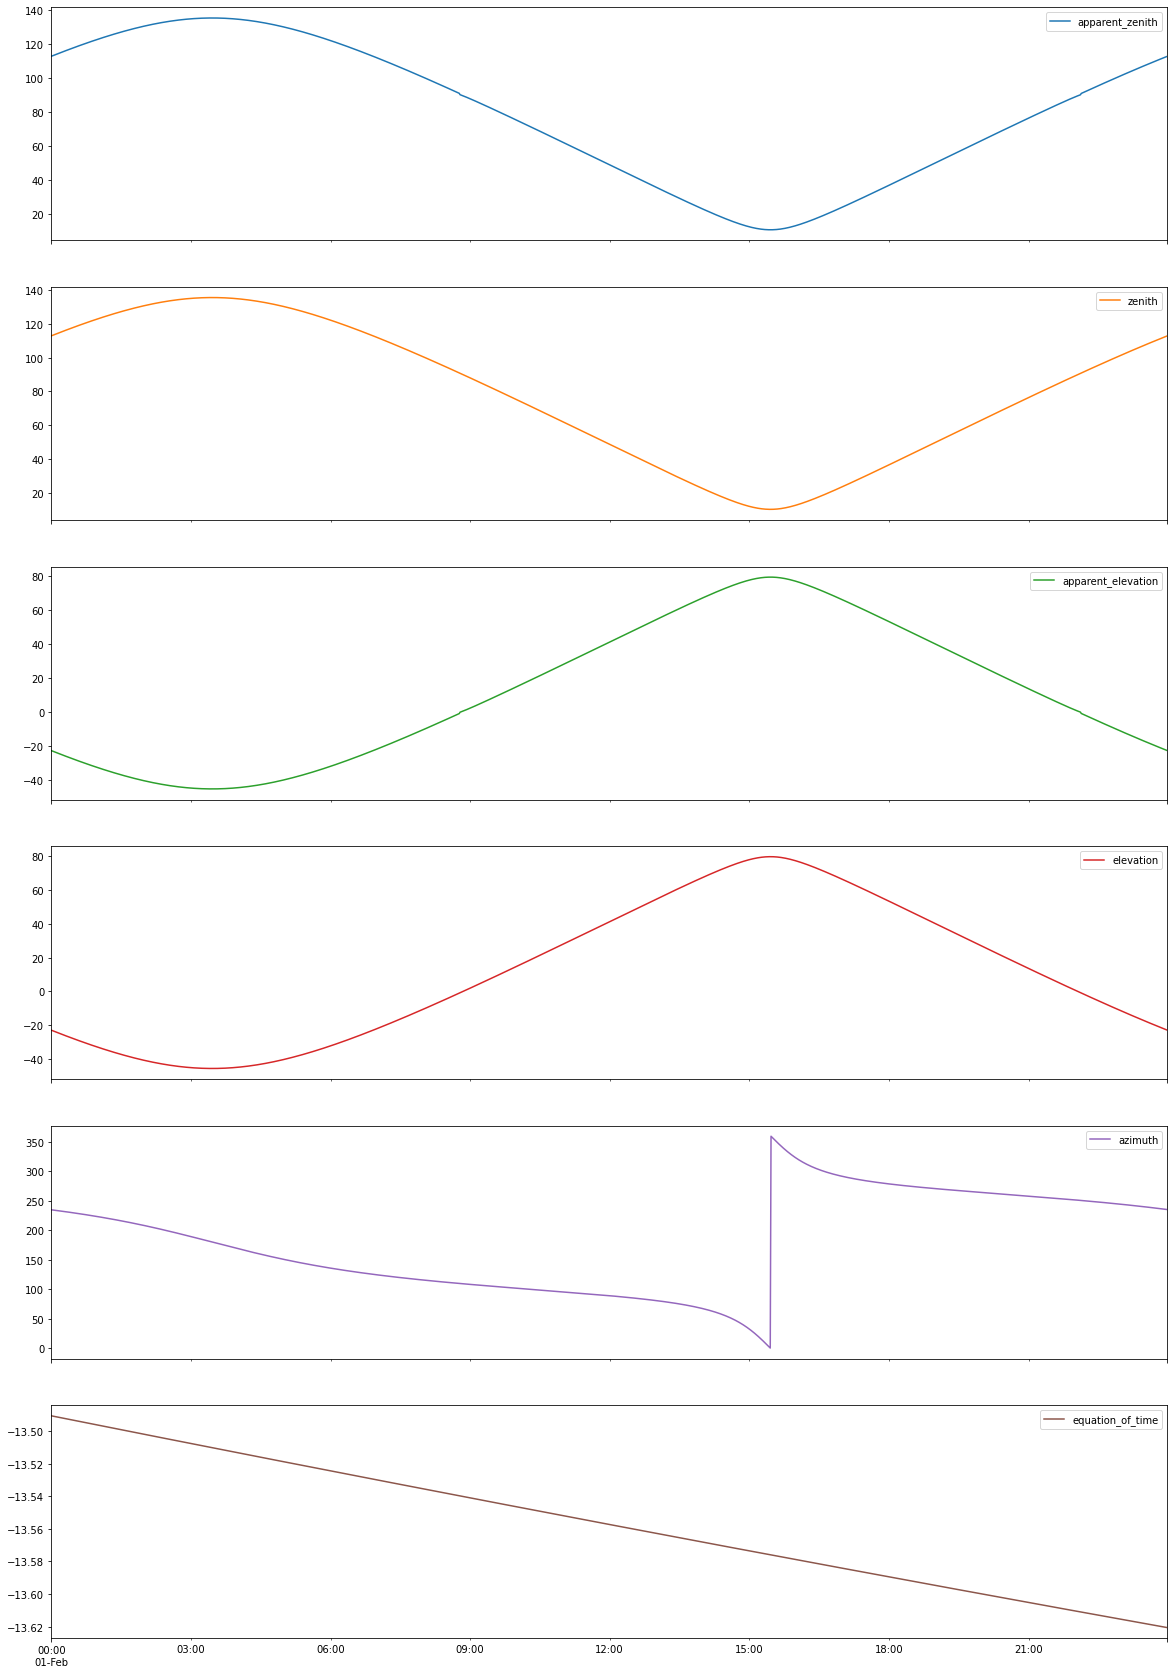

In [15]:
    sp18plot = sp2018.loc['2018-02-01'].plot(subplots=True, figsize=(20, 30))


In [12]:
sp2018

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2018-01-01 00:00:00+00:00,110.663146,110.663146,-20.663146,-20.663146,228.196556,-3.326452
2018-01-01 00:01:00+00:00,110.828313,110.828313,-20.828313,-20.828313,228.025374,-3.326779
2018-01-01 00:02:00+00:00,110.993036,110.993036,-20.993036,-20.993036,227.853515,-3.327106
2018-01-01 00:03:00+00:00,111.157312,111.157312,-21.157312,-21.157312,227.680976,-3.327434
2018-01-01 00:04:00+00:00,111.321138,111.321138,-21.321138,-21.321138,227.507754,-3.327761
...,...,...,...,...,...,...
2018-12-31 17:16:00+00:00,27.225043,27.233321,62.774957,62.766679,272.527550,-3.062259
2018-12-31 17:17:00+00:00,27.446600,27.454958,62.553400,62.545042,272.394111,-3.062590
2018-12-31 17:18:00+00:00,27.668178,27.676616,62.331822,62.323384,272.261829,-3.062921
2018-12-31 17:19:00+00:00,27.889777,27.898294,62.110223,62.101706,272.130675,-3.063252


In [16]:
sum = sp2018.zenith + sp2018.elevation

In [17]:
sum

2018-01-01 00:00:00+00:00    90.0
2018-01-01 00:01:00+00:00    90.0
2018-01-01 00:02:00+00:00    90.0
2018-01-01 00:03:00+00:00    90.0
2018-01-01 00:04:00+00:00    90.0
                             ... 
2018-12-31 17:16:00+00:00    90.0
2018-12-31 17:17:00+00:00    90.0
2018-12-31 17:18:00+00:00    90.0
2018-12-31 17:19:00+00:00    90.0
2018-12-31 17:20:00+00:00    90.0
Freq: T, Length: 525201, dtype: float64

In [24]:
 cosSZA = np.cos(np.deg2rad(sp2018.zenith))

<AxesSubplot:>

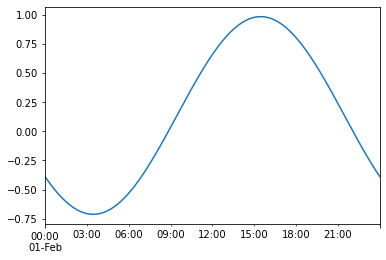

In [25]:
cosSZA.loc['2018-02-01'].plot()

<AxesSubplot:>

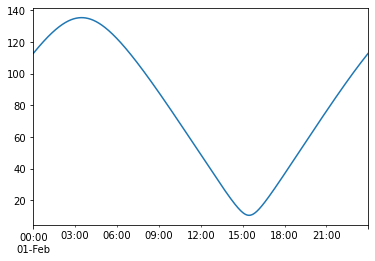

In [23]:
sp2018.zenith.loc['2018-02-01'].plot()

In [ ]:
ghimax = eth2018[0]*1.5*(cosSZA.azimuth**(1.2)) + 100

In [27]:
cosSZA18 = np.cos(np.deg2rad(sp2018.zenith))

In [28]:
cosSZA19 = np.cos(np.deg2rad(sp2019.zenith))
cosSZA20 = np.cos(np.deg2rad(sp2020.zenith))
cosSZA21 = np.cos(np.deg2rad(sp2021.zenith))

In [30]:
cosSZA18.zenith

AttributeError: 'Series' object has no attribute 'zenith'

In [49]:
ghiPPmax19

2018-01-01 00:00:00+00:00   NaN
2018-01-01 00:01:00+00:00   NaN
2018-01-01 00:02:00+00:00   NaN
2018-01-01 00:03:00+00:00   NaN
2018-01-01 00:04:00+00:00   NaN
                             ..
2019-12-31 23:55:00+00:00   NaN
2019-12-31 23:56:00+00:00   NaN
2019-12-31 23:57:00+00:00   NaN
2019-12-31 23:58:00+00:00   NaN
2019-12-31 23:59:00+00:00   NaN
Length: 1047983, dtype: float64

In [50]:
ghiPPmax18 = eth2018[0]*1.5*(cosSZA18**(1.2)) + 100
ghiPPmax19 = eth2019[0]*1.5*(cosSZA19**(1.2)) + 100
ghiPPmax20 = eth2020[0]*1.5*(cosSZA20**(1.2)) + 100
ghiPPmax21 = eth2021[0]*1.5*(cosSZA21**(1.2)) + 100

In [51]:
ghiERmax18 = eth2018[0]*1.2*(cosSZA18**(1.2)) + 50
ghiERmax19 = eth2019[0]*1.2*(cosSZA19**(1.2)) + 50
ghiERmax20 = eth2020[0]*1.2*(cosSZA20**(1.2)) + 50
ghiERmax21 = eth2021[0]*1.2*(cosSZA21**(1.2)) + 50


In [41]:
ghiPPmax19 = eth2019[0]*1.5*(cosSZA**(1.2)) + 100
ghiERmax19 = eth2019[0]*1.2*(cosSZA**(1.2)) + 50

In [42]:
ghiPPmax20 = eth2020[0]*1.5*(cosSZA**(1.2)) + 100
ghiERmax20 = eth2020[0]*1.2*(cosSZA**(1.2)) + 50

<AxesSubplot:>

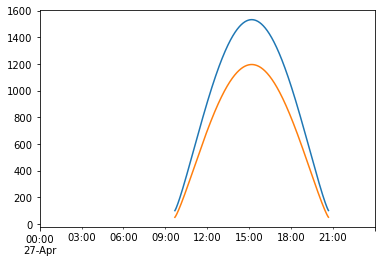

In [36]:
ghiPPmax18.loc['2018-04-27'].plot()
ghiERmax18.loc['2018-04-27'].plot()

<AxesSubplot:>

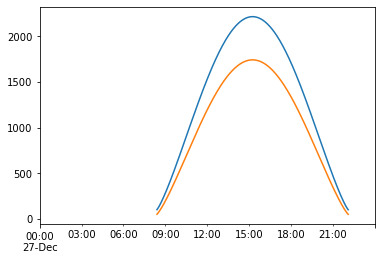

In [37]:
ghiPPmax18.loc['2018-12-27'].plot()
ghiERmax18.loc['2018-12-27'].plot()

In [39]:
ghiPPmax18.max()

2212.3443036720437

In [40]:
ghiERmax18.max()

1739.8754429376352

In [52]:
ghiPPmax19.max()

2212.2468417550963

In [53]:
ghiERmax19.max()

1739.7974734040768

In [54]:
ghiPPmax20.max()

2212.3958862834015

In [55]:
ghiERmax20.max()

1739.916709026721

In [59]:
cosSZA18.columns

AttributeError: 'Series' object has no attribute 'columns'

In [60]:
fr = cosSZA18.to_frame()

In [63]:
fr.columns

Index(['zenith'], dtype='object')

In [65]:
ghiflags18 = pd.read_pickle(BSRN_path+'2018ghiflagcount.pkl')

In [67]:
ghiflags18

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
-1,29739.0,29739.0,29739.0,29739.0,29739.0
0,495461.0,288330.0,492880.0,495420.0,468774.0
1,NaN,188316.0,2575.0,NaN,26337.0
2,1.0,5.0,6.0,41.0,7.0
3,NaN,18811.0,1.0,NaN,344.0
4,NaN,NaN,NaN,1.0,NaN


In [69]:
ghiflags19 = pd.read_pickle(BSRN_path+'2019ghiflagcount.pkl')
ghiflags20 = pd.read_pickle(BSRN_path+'2020ghiflagcount.pkl')
ghiflags21 = pd.read_pickle(BSRN_path+'2021ghiflagcount.pkl')

In [70]:
ghiflags19

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
-1,33318,21991,21991,21991.0,21991
0,486004,276668,500576,500689.0,464008
1,8,202167,29,NaN,12781
2,31,45,41,69.0,38
3,3409,21809,43,3.0,23862
4,12,102,102,30.0,102


In [71]:
ghiflags20

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
-1,156509.0,156509.0,156509.0,156509.0,156509.0
0,370528.0,188191.0,362184.0,370517.0,350724.0
1,NaN,54285.0,8205.0,NaN,9208.0
2,3.0,3.0,7.0,13.0,NaN
3,NaN,128052.0,135.0,NaN,10599.0
4,NaN,NaN,NaN,1.0,NaN


In [72]:
ghiflags21

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
-1,NaN,NaN,NaN,NaN,NaN
0,29666.0,16695.0,29666.0,29666.0,28052.0
1,NaN,2253.0,NaN,NaN,1007.0
2,NaN,NaN,NaN,NaN,NaN
3,NaN,10718.0,NaN,NaN,607.0
4,NaN,NaN,NaN,NaN,NaN


In [73]:
ghisumflags = ghiflags18 +ghiflags19+ghiflags20+ghiflags21

In [74]:
ghisumflags

,GHIP_SI02pt100,GHIP_SMP11,GHIP_SMP22,GHIP_SPN1,GHIT_SMP22
-1,NaN,NaN,NaN,NaN,NaN
0,1381659.0,769884.0,1385306.0,1396292.0,1311558.0
1,NaN,447021.0,NaN,NaN,49333.0
2,NaN,NaN,NaN,NaN,NaN
3,NaN,179390.0,NaN,NaN,35412.0
4,NaN,NaN,NaN,NaN,NaN


In [75]:
difflags18 = pd.read_pickle(BSRN_path+'2018difflagcount.pkl')
difflags19 = pd.read_pickle(BSRN_path+'2019difflagcount.pkl')
difflags20 = pd.read_pickle(BSRN_path+'2020difflagcount.pkl')
difflags21 = pd.read_pickle(BSRN_path+'2021difflagcount.pkl')

In [76]:
difflags18

,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1
-1,29739.0,29739.0,29739,29739.0
0,495441.0,478735.0,480800,144288.0
1,NaN,12277.0,11466,161302.0
2,21.0,5.0,2833,NaN
3,NaN,4445.0,208,189872.0
4,NaN,NaN,155,NaN


In [77]:
difflags19

,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1
-1,21991.0,21991,21991,33318
0,498686.0,358931,496773,45663
1,NaN,30545,3443,230730
2,119.0,716,347,7
3,1977.0,110420,52,213050
4,9.0,179,176,14


In [78]:
difflags20

,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1
-1,156509.0,156509.0,156509,156509.0
0,370483.0,350676.0,361141,61592.0
1,NaN,9208.0,8978,150282.0
2,45.0,48.0,211,NaN
3,NaN,10599.0,189,158657.0
4,3.0,NaN,12,NaN


In [79]:
difflags21

,DfHIP_SPN1,DfHIRP_SMP11,DfHIT_SMP22,DIF_GLO_REF_SPN1
-1,NaN,NaN,NaN,NaN
0,29638.0,28052.0,28822.0,1832.0
1,NaN,1007.0,833.0,13601.0
2,28.0,NaN,NaN,NaN
3,NaN,607.0,11.0,14233.0
4,NaN,NaN,NaN,NaN


In [80]:
dniflags18 = pd.read_pickle(BSRN_path+'2018dniflagcount.pkl')
dniflags19 = pd.read_pickle(BSRN_path+'2019dniflagcount.pkl')
dniflags20 = pd.read_pickle(BSRN_path+'2020dniflagcount.pkl')
dniflags21 = pd.read_pickle(BSRN_path+'2021dniflagcount.pkl')

In [81]:
dniflags18

,DNI_SHP1
-1,29739.0
0,422644.0
1,71472.0
2,NaN
3,1346.0
4,NaN


In [82]:
dniflags19

,DNI_SHP1
-1,21991.0
0,435376.0
1,64435.0
2,1.0
3,979.0
4,NaN


In [83]:
dniflags20

,DNI_SHP1
-1,156509.0
0,319491.0
1,50317.0
2,NaN
3,723.0
4,NaN


In [84]:
dniflags21

,DNI_SHP1
-1,NaN
0,26986.0
1,2569.0
2,NaN
3,111.0
4,NaN
